# Построение модели без предварительной обработки данных

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
d = pd.read_csv('train.csv')
d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Удалим все пропущенные значения и категориальные переменные.

In [3]:
d = d.dropna()

In [4]:
d = d.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'SibSp', 'Parch'], axis = 1)

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  183 non-null    int64  
 1   Age       183 non-null    float64
 2   Fare      183 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 5.7 KB


In [6]:
for i in d:
    print(d[i].value_counts())
    print()

1    123
0     60
Name: Survived, dtype: int64

36.0    11
24.0     9
19.0     6
35.0     6
31.0     5
        ..
71.0     1
3.0      1
1.0      1
36.5     1
26.0     1
Name: Age, Length: 63, dtype: int64

26.5500     7
53.1000     5
90.0000     4
10.5000     4
13.0000     4
           ..
211.5000    1
8.0500      1
81.8583     1
27.7500     1
5.0000      1
Name: Fare, Length: 93, dtype: int64



In [7]:
y = d['Survived']
X = d.drop('Survived', axis = 1)

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
model.score(X_test, y_test)

0.6486486486486487

# Предобработка данных

In [9]:
df = pd.read_csv('train.csv')

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Удалим ненужные признаки.

In [13]:
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [14]:
for i in df:
    print(df[i].value_counts())
    print()

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

S    644
C    168
Q     77
Name: Embarked, dtype: int64



Посмотрим, какой процент занимают пропущенные значения.

In [15]:
percent =  round(100-df.dropna().shape[0]/df.shape[0]*100,2)
print(f'Количество пропущенных значений: {percent}%')

Количество пропущенных значений: 79.46%


Удалим категорию Cabin, так как пропущенных значений слишком много, и заполнять их нет смысла.

In [16]:
df = df.drop(['Cabin'], axis = 1)

Удалим пропущенные значения в Embarked, так как их всего два.

In [17]:
df = df.drop(df[df['Embarked'].isnull()].index, axis = 0)

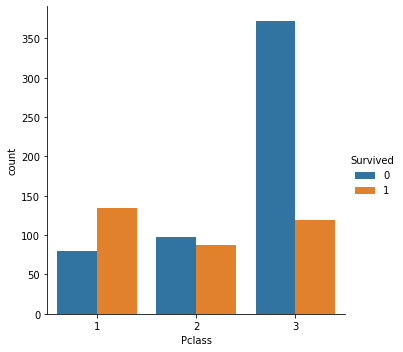

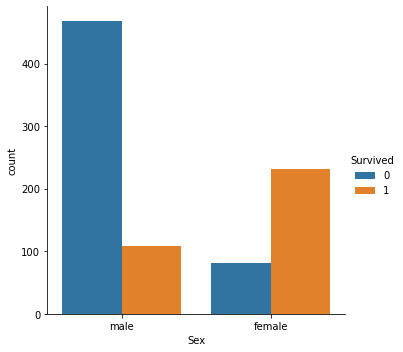

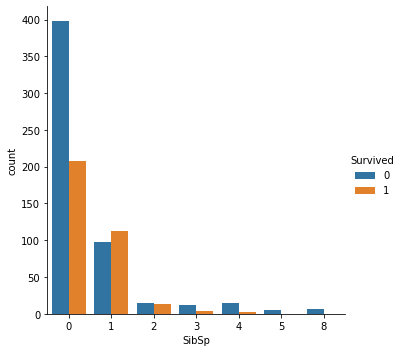

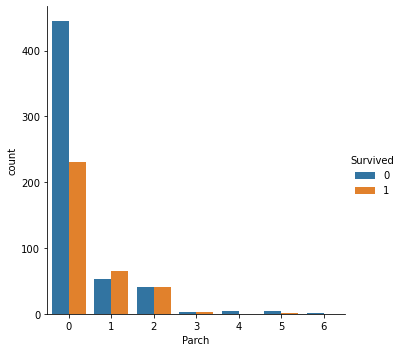

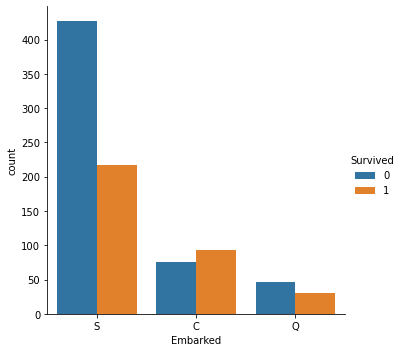

In [18]:
columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
for i in columns:
    sns.catplot(x=i, hue='Survived', data=df, kind="count")
  

По графикам видно, что выживаемость пассажира сильно зависит от пола, класса каюты, но то же самое можно сказать и о признаках SibSp, Parch, хоть наблюдается не такая сильная зависимость. Делаем вывод, что все эти признаки можно оставить, а позже их преобразовать.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


Займемся заполнением пропущенных значений в колонке Age.

In [20]:
df = pd.get_dummies(df, columns = ['Sex', 'Embarked'], drop_first = True)

In [21]:
df = df.rename(columns = {'Sex_male':'Sex'})

In [22]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


<AxesSubplot:>

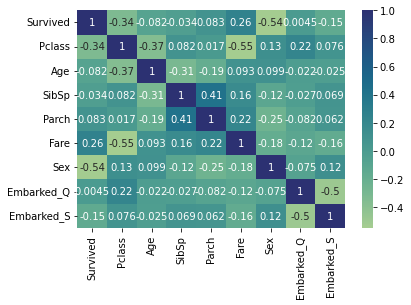

In [23]:
corr = df.corr()
sns.heatmap(corr, annot = True, cmap='crest')

In [24]:
print(df['Age'].median())
print(df['Age'].mean())
print(df['Age'].mode())

28.0
29.64209269662921
0    24.0
Name: Age, dtype: float64


In [25]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

In [26]:
min(df['Age'])

0.42

In [27]:
max(df['Age'])

80.0

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    float64
 1   Pclass      889 non-null    float64
 2   Age         889 non-null    float64
 3   SibSp       889 non-null    float64
 4   Parch       889 non-null    float64
 5   Fare        889 non-null    float64
 6   Sex         889 non-null    float64
 7   Embarked_Q  889 non-null    float64
 8   Embarked_S  889 non-null    float64
dtypes: float64(9)
memory usage: 62.6 KB


In [29]:
print(df['Age'].median())
print(df['Age'].mean())
print(df['Age'].mode())

29.0
30.018508436445412
0    24.0
Name: Age, dtype: float64


Сравнивая меры центральной тендеции до использования KNN-Imputer и после, видим, что он хорошо сработал для заполнения пустых ячеек возраста.

Исследуем данные на выбросы. Начнем с возраста.

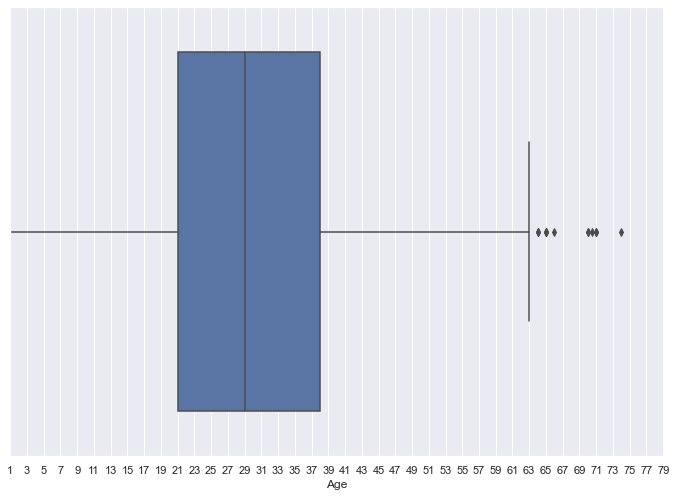

In [31]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x = df['Age'])
ax.set_xlim(1,31)
ax.set_xticks(range(1,80,2))
plt.show()

In [32]:
np.where(df['Age']>63)

(array([ 33,  54,  95, 115, 279, 437, 455, 492, 544, 629, 671, 744, 849],
       dtype=int64),)

Значения больше 63 - выбросы. Удалим их.

In [33]:
df = df.drop(df[df['Age']>63].index, axis = 0)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 0 to 888
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    876 non-null    float64
 1   Pclass      876 non-null    float64
 2   Age         876 non-null    float64
 3   SibSp       876 non-null    float64
 4   Parch       876 non-null    float64
 5   Fare        876 non-null    float64
 6   Sex         876 non-null    float64
 7   Embarked_Q  876 non-null    float64
 8   Embarked_S  876 non-null    float64
dtypes: float64(9)
memory usage: 68.4 KB


Посмотрим на данные в Fare.

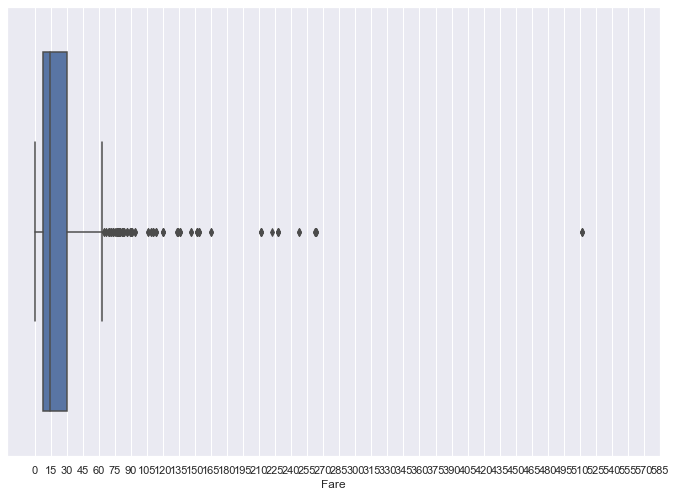

In [35]:
fig, ax = plt.subplots()
sns.boxplot(x = df['Fare'])
ax.set_xticks(range(0,600,15))

In [36]:
max(df['Fare'])

512.3292

In [37]:
np.where(df['Fare']>61)


(array([  1,  27,  31,  33,  51,  59,  69,  85,  89,  93,  98, 113, 115,
        119, 134, 146, 150, 154, 175, 190, 196, 210, 213, 219, 225, 240,
        251, 252, 253, 257, 263, 264, 270, 284, 285, 291, 293, 299, 300,
        301, 304, 305, 312, 313, 318, 319, 326, 328, 330, 331, 335, 360,
        363, 367, 369, 371, 374, 379, 384, 387, 406, 429, 438, 446, 476,
        478, 487, 489, 495, 496, 511, 518, 528, 531, 535, 540, 547, 548,
        571, 575, 577, 581, 599, 605, 617, 630, 634, 644, 648, 649, 654,
        667, 669, 677, 686, 688, 696, 704, 718, 725, 729, 730, 741, 746,
        750, 752, 766, 776, 779, 789, 807, 821, 832, 835, 841, 848, 864],
       dtype=int64),)

In [38]:
a = len(df[df['Fare']>61])
print(f'Количество пассажиров, билет которых стоил больше 61: {a}.')

Количество пассажиров, билет которых стоил больше 61: 117.


In [39]:
и = len(df[(df['Fare']>61) & (df['Survived']==1)])
print(f'Количество пассажиров, билет которых стоил больше 61 и которые выжили: {и}.')

Количество пассажиров, билет которых стоил больше 61 и которые выжили: 80.


In [40]:
print('Количество данных с выбросами, которые следовало бы удалить, в %:', round(117/889*100))

Количество данных с выбросами, которые следовало бы удалить, в %: 13


13% - слишком много, чтобы избавляться от всех данных с выбросами в Fare. Поэтому оставим их также в силу того, что значительная часть пассажиров с дорогостоящим билетом выжила. 

In [41]:
print(min(df['Fare']))
print(max(df['Fare']))
print(df['Fare'].mean())

0.0
512.3292
31.880121803652933


In [42]:
df['fare'] = pd.qcut(df['Fare'],4)
df['fare'].unique()

[(-0.001, 7.896], (30.696, 512.329], (7.896, 14.454], (14.454, 30.696]]
Categories (4, interval[float64, right]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 30.696] < (30.696, 512.329]]

In [43]:
df['Fare_cat']=0
df.loc[df['Fare']<=7.896,'Fare_cat']=0
df.loc[(df['Fare']>7.896)&(df['Fare']<=14.454),'Fare_cat']=1
df.loc[(df['Fare']>14.454)&(df['Fare']<=30.969),'Fare_cat']=2
df.loc[(df['Fare']>30.696)&(df['Fare']<=61),'Fare_cat']=3
df.loc[df['Fare']>61,'Fare_cat']=5


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


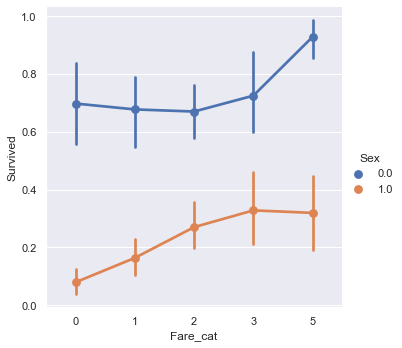

In [44]:
sns.factorplot('Fare_cat','Survived',data=df,hue='Sex')

Убеждаемся, что от стоимости билета шансы на выживаемость растут.

Сделаем возрастные категории.

In [45]:
df['age'] = pd.qcut(df['Age'],4)
df['age'].unique()

[(21.0, 29.0], (37.0, 63.0], (29.0, 37.0], (0.419, 21.0]]
Categories (4, interval[float64, right]): [(0.419, 21.0] < (21.0, 29.0] < (29.0, 37.0] < (37.0, 63.0]]

In [46]:
df['Age_cat']=0
df.loc[df['Age']<=21,'Age_cat']=0
df.loc[(df['Age']>21)&(df['Age']<=29),'Age_cat']=1
df.loc[(df['Age']>29)&(df['Age']<=37),'Age_cat']=2
df.loc[(df['Age']>37),'Age_cat']=3

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


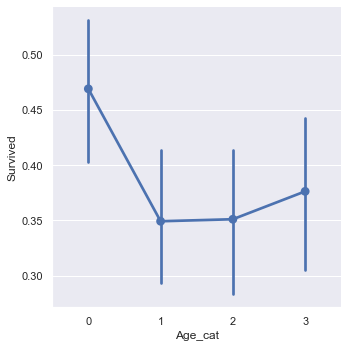

In [47]:
sns.factorplot('Age_cat','Survived',data=df)

Видим, что шанс на выживание с возрастом уменьшается.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


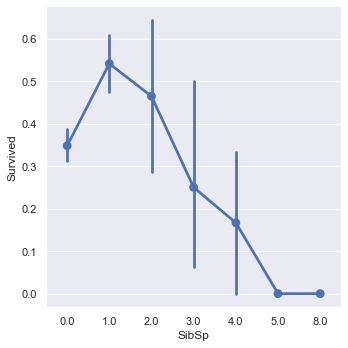

In [48]:
sns.factorplot('SibSp','Survived',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


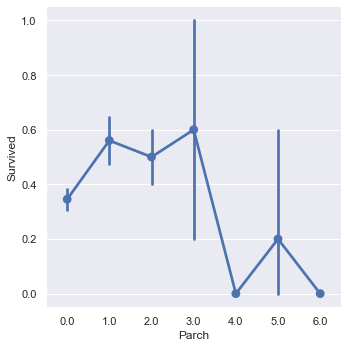

In [49]:
sns.factorplot('Parch','Survived',data=df)

In [50]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_Q,Embarked_S,fare,Fare_cat,age,Age_cat
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,"(-0.001, 7.896]",0,"(21.0, 29.0]",1
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,"(30.696, 512.329]",5,"(37.0, 63.0]",3
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,"(7.896, 14.454]",1,"(21.0, 29.0]",1
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,"(30.696, 512.329]",3,"(29.0, 37.0]",2
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,"(7.896, 14.454]",1,"(29.0, 37.0]",2


Удалим ненужные столбцы, которые мы использовали для создания категориальных признаков.

In [51]:
df = df.drop(['Age', 'Fare', 'fare', 'age'], axis = 1)
df.head()

,Survived,Pclass,SibSp,Parch,Sex,Embarked_Q,Embarked_S,Fare_cat,Age_cat
0,0.0,3.0,1.0,0.0,1.0,0.0,1.0,0,1
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,5,3
2,1.0,3.0,0.0,0.0,0.0,0.0,1.0,1,1
3,1.0,1.0,1.0,0.0,0.0,0.0,1.0,3,2
4,0.0,3.0,0.0,0.0,1.0,0.0,1.0,1,2


In [52]:
df = pd.get_dummies(df, columns = ['Pclass', 'SibSp', 'Parch', 'Fare_cat', 'Age_cat'], drop_first = True)
df.head()

,Survived,Sex,Embarked_Q,Embarked_S,Pclass_2.0,Pclass_3.0,SibSp_1.0,SibSp_2.0,SibSp_3.0,SibSp_4.0,...,Parch_4.0,Parch_5.0,Parch_6.0,Fare_cat_1,Fare_cat_2,Fare_cat_3,Fare_cat_5,Age_cat_1,Age_cat_2,Age_cat_3
0,0.0,1.0,0.0,1.0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.0,0.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1.0,0.0,0.0,1.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,1.0,0.0,0.0,1.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0.0,1.0,0.0,1.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


# Обучение модели

In [53]:
y = df['Survived']
X = df.drop('Survived', axis = 1)

In [55]:
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7443181818181818

По метрике accuracy качество модели по сравнению с первой повысилось примерно на 10%.